In [1]:
from pdf2image import convert_from_path

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from PIL import Image

In [3]:
# Store Pdf with convert_from_path function
images = convert_from_path('task4_doc_page-0001.pdf')

In [4]:
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339>]

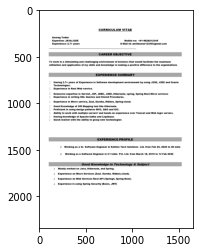

In [5]:
# plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.imshow(images[0])
plt.show()

# image preprocessing 
# adaptive thresholding 

In [6]:
def preprocess_image(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=1.5,fy=1.5, interpolation=cv2.INTER_LINEAR)
    processed_image = cv2.adaptiveThreshold(resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,61,11)
   
    return processed_image

In [7]:
# i1 = preprocess_image(images[0])
img = []
for i in range(len(images)):
    im = preprocess_image(images[i])
    img.append(im)
    
    

In [8]:
# plt.imshow(i1)
# plt.show()

# pytesserect 

In [9]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [10]:
text = []
for i in range(len(images)):
    st = pytesseract.image_to_string(img[i])
    text.append(st)
    

In [11]:
text

['CURRICULUM VITAE\n\nAnurag Yadav\nExpertise: JAVA/J2EE Mobile no: +91-9628212345\nExperience: 2.7+ years E-Mail Id: amitkumar1234S@gmail.com\n\nCAREER OBJECTIVE\n\nTo work in a stimulating and challenging environment of Avionics that would facilitate the maximum\nutilization and application of my skills and knowledge in making a positive difference to the organizations\n\nEXPERIENCE SUMMARY\n\nHaving 2.7+ years of Experience in Software development environment by using J2SE, J2EE and Oracle\nTechnologies.\nExperience in Rest Web service.\n\nOo\n\nExtensive expertise in Serviet, JSP, JDBC, J2EE, Hibernate, spring, Spring Boot Micro services\nExperience in writing SQL Queries and Stored Procedures.\n\nExperience in Micro service, Zuul, Eureka, Ribbon, Spring-cloud.\nGood Knowledge of O/R Mapping tool like Hibernate.\nProficient in using design patterns MVC, DAO and IOC.\n\nAbility to work with multiple servers’ and hands on experience over Tomcat and Web logic servers.\n\nHaving knowle

In [12]:
listToStr = ''.join([str(i) for i in text])
 
print(listToStr)

CURRICULUM VITAE

Anurag Yadav
Expertise: JAVA/J2EE Mobile no: +91-9628212345
Experience: 2.7+ years E-Mail Id: amitkumar1234S@gmail.com

CAREER OBJECTIVE

To work in a stimulating and challenging environment of Avionics that would facilitate the maximum
utilization and application of my skills and knowledge in making a positive difference to the organizations

EXPERIENCE SUMMARY

Having 2.7+ years of Experience in Software development environment by using J2SE, J2EE and Oracle
Technologies.
Experience in Rest Web service.

Oo

Extensive expertise in Serviet, JSP, JDBC, J2EE, Hibernate, spring, Spring Boot Micro services
Experience in writing SQL Queries and Stored Procedures.

Experience in Micro service, Zuul, Eureka, Ribbon, Spring-cloud.
Good Knowledge of O/R Mapping tool like Hibernate.
Proficient in using design patterns MVC, DAO and IOC.

Ability to work with multiple servers’ and hands on experience over Tomcat and Web logic servers.

Having knowledge of Apache kafka and Liquib

# extract mobile number 

In [13]:
import re
mobile_Regex = re.compile (r'[\d]{10}|[\d]{3}-[\d]{3}-[\d]{3}')
mobile = mobile_Regex.findall(listToStr)
print(mobile)

['9628212345']


# extract email id 

In [14]:
email_regex = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
email = email_regex.findall(listToStr)
print(email)

['amitkumar1234S@gmail.com']


# extract hyperlink

In [15]:
url_regex = re.compile('http://[a-zA-Z0-9._\-]+\.[a-zA-Z0-9_\-/]+')
url = url_regex.findall(listToStr)
print(url)

[]


# education

In [16]:
education = re.findall(r'BE|B.E|Bachelor of Engineering|MCA|BCA|BS|B.S|C.A.|c.a|B.Com|B. Com|M. Com|M.Com|M. Com|ME|M.E|M.E|MS|M.S|bba|bca|mca|BTECH|B.TECH|M.TECH|MTECH|PHD|phd|ph.d|Ph.D.|MBA|mba|graduate|post-graduate|masters|SSC|HSC|CBSE|ICSE|X|XII', listToStr)
education 

['BJE',
 'cha',
 'X',
 'mca',
 'X',
 'MyS',
 'mca',
 'MCA',
 'BCA',
 'MyS',
 'MS',
 'mca',
 'MS',
 'cia']